In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
%matplotlib inline

In [3]:
import numpy as np
N = np.array([24,None,29,'str',np.nan,23,20,(),[],...])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('fault.csv')
print (df.head) 

   

<bound method NDFrame.head of        Temperature  Salinity    DO%     PH  Turbidity
0            13.16     33.06  82.90   9.88        3.3
1            13.18     33.13  83.50   5.89        4.4
2            13.13     33.25  84.20   7.90        4.6
3            13.10     33.34  84.81   7.91        5.8
4            13.05     33.45  85.60   7.92        3.5
5            12.92     33.67  88.50   7.95        7.6
6            12.86     33.74  88.00   7.96        8.8
7            12.80     33.80  88.81   7.97        7.5
8            12.79     33.84  91.20   7.98        6.5
9            12.86     33.72  93.00   7.97        8.7
10           12.60     32.79  84.60   7.90        4.3
11           12.58     32.87  84.90   7.91        4.4
12           12.56     33.00  85.10   9.02        4.5
13           12.50     33.29  85.20   6.54        5.8
14           12.49     33.54  86.70  12.96        4.6
15           12.51     34.03  91.50   8.01        2.4
16           12.13     33.58  94.81   9.03        6.

In [6]:
cols = ['Highly_acidic','Highly_alkaline','excess_acidic','excess_alkaline']
df1 = pd.DataFrame(columns= cols)

df1

,Highly_acidic,Highly_alkaline,excess_acidic,excess_alkaline


In [7]:
df['PH']

0         9.88
1         5.89
2         7.90
3         7.91
4         7.92
5         7.95
6         7.96
7         7.97
8         7.98
9         7.97
10        7.90
11        7.91
12        9.02
13        6.54
14       12.96
15        8.01
16        9.03
17        8.09
18        8.04
19        7.99
20        7.97
21        7.92
22        7.94
23        7.96
24        7.98
25        8.02
26        9.00
27        7.96
28        7.84
29        7.85
         ...  
39968     8.02
39969     8.00
39970     8.01
39971     8.02
39972     8.03
39973     8.03
39974     8.03
39975     8.02
39976     8.02
39977     8.02
39978     8.01
39979     8.00
39980     8.00
39981     7.99
39982     7.98
39983     7.96
39984     7.95
39985     7.94
39986     7.94
39987     7.94
39988     7.98
39989     8.02
39990     8.10
39991     8.06
39992     8.03
39993     7.98
39994     7.97
39995     7.99
39996     8.01
39997     8.05
Name: PH, Length: 39998, dtype: float64

In [8]:
for i in range(len(df['PH'])):
    if(df['PH'][i]<4):
        df1 = pd.concat([pd.DataFrame([{'Highly_acidic':1,'Highly_alkaline':0,'excess_acidic':0,'excess_alkaline':0}]),df1],
        ignore_index=True)
  
    if df['PH'][i]>4 and df['PH'][i]<6:    
        df1 = pd.concat([pd.DataFrame([ {'Highly_acidic':0,'Highly_alkaline':0,'excess_acidic':1,'excess_alkaline':0}]),df1],
        ignore_index=True)
            
    if df['PH'][i]>9 and df['PH'][i]<11:  
        df1=pd.concat([pd.DataFrame([ {'Highly_acidic':0,'Highly_alkaline':0,'excess_acidic':0,'excess_alkaline':1}]),df1],
        ignore_index=True)
            
    if df['PH'][i]>11:    
        df1 = pd.concat([pd.DataFrame([ {'Highly_acidic':0,'Highly_alkaline':1,'excess_acidic':0,'excess_alkaline':0}]),df1],
        ignore_index=True)

In [9]:
df1.head()


,Highly_acidic,Highly_alkaline,excess_acidic,excess_alkaline
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1


In [10]:
def check(list): 
    return all(i == list[0] for i in list) 

List = list(df['PH'][-9:]) 
check(List)

False

In [11]:
threshold = 6
def check1(list): 
    return all(i < threshold for i in list) 

check1([j-i for i, j in zip(List[:-1], List[1:])])
    

True

In [12]:
List

[8.02, 8.1, 8.06, 8.03, 7.98, 7.97, 7.99, 8.01, 8.05]

In [13]:
import seaborn as sns

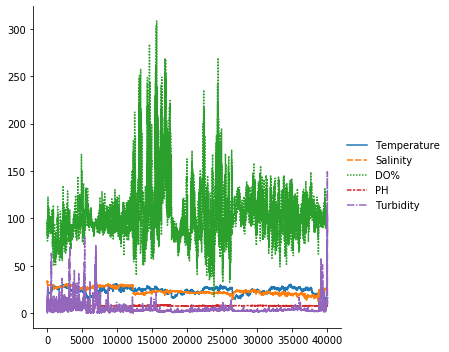

In [14]:
sns.relplot(data = df,kind = 'line')

In [15]:

from datetime import datetime, timedelta

# get current time
now = datetime.now()
print ("Today's date: ", str(now))
#add 15 days to current date

lst = []
for i in range(len(df['PH'])):
    future_date_after_60sec= now + timedelta(seconds = 60)
    now = future_date_after_60sec
    lst.append(now)
    print(now)
df['time'] = pd.DataFrame(lst)

Today's date:  2020-03-06 12:35:45.861458
2020-03-06 12:36:45.861458
2020-03-06 12:37:45.861458
2020-03-06 12:38:45.861458
2020-03-06 12:39:45.861458
2020-03-06 12:40:45.861458
2020-03-06 12:41:45.861458
2020-03-06 12:42:45.861458
2020-03-06 12:43:45.861458
2020-03-06 12:44:45.861458
2020-03-06 12:45:45.861458
2020-03-06 12:46:45.861458
2020-03-06 12:47:45.861458
2020-03-06 12:48:45.861458
2020-03-06 12:49:45.861458
2020-03-06 12:50:45.861458
2020-03-06 12:51:45.861458
2020-03-06 12:52:45.861458
2020-03-06 12:53:45.861458
2020-03-06 12:54:45.861458
2020-03-06 12:55:45.861458
2020-03-06 12:56:45.861458
2020-03-06 12:57:45.861458
2020-03-06 12:58:45.861458
2020-03-06 12:59:45.861458
2020-03-06 13:00:45.861458
2020-03-06 13:01:45.861458
2020-03-06 13:02:45.861458
2020-03-06 13:03:45.861458
2020-03-06 13:04:45.861458
2020-03-06 13:05:45.861458
2020-03-06 13:06:45.861458
2020-03-06 13:07:45.861458
2020-03-06 13:08:45.861458
2020-03-06 13:09:45.861458
2020-03-06 13:10:45.861458
2020-03-06 13

In [18]:
df_temp = df[['Temperature','time']] 
df_temp = df_temp.set_index('time')
df_temp1 =  df_temp[0:39997]
df_temp1

,Temperature
time,
2020-03-06 12:36:45.861458,13.16
2020-03-06 12:37:45.861458,13.18
2020-03-06 12:38:45.861458,13.13
2020-03-06 12:39:45.861458,13.10
2020-03-06 12:40:45.861458,13.05
2020-03-06 12:41:45.861458,12.92
2020-03-06 12:42:45.861458,12.86
2020-03-06 12:43:45.861458,12.80
2020-03-06 12:44:45.861458,12.79


In [16]:
import statsmodels.api as sm

In [19]:
mod = sm.tsa.statespace.SARIMAX(df_temp1,
                                order=(1, 1, 1))

results = mod.fit()
#print(results.summary().tables[1])

C:\Users\KOLLICHINMAIVIGNYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


In [50]:
var = results.forecast()
var.to_frame()


,0
2020-04-03 07:13:45.861458,16.342153


In [58]:
var[0] 
reading = 16.37

16.342153435667555

In [67]:

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'